# 1. Data Acquisition and Imports

In [ ]:
# Installing the Ucimlrepo package
! pip install ucimlrepo

In [ ]:
# Importing the dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)


{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'ID': 386, 'type': 'NATIVE', 'title': 'Explainable Artificial Intelligen

## 1.1. Importing useful Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Data Inspection

This section is aimed at inspecting the dataset to understand the data types and whether or not if the data must be cleaned.


In [ ]:
# preview of the features
display(X)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [ ]:
# Preview of the targets
display(y)

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


This is a multitarget problem whereby we need to predict multiple labels for a single sample of dataset.

In [ ]:
# Feature size check
X.shape

(10000, 6)

In [ ]:
# Target size check
y.shape

(10000, 6)

In [ ]:
# checking for missing values from the fetures dataframe
X.isnull().sum()

,0
Type,0
Air temperature,0
Process temperature,0
Rotational speed,0
Torque,0
Tool wear,0


In [ ]:
y.isnull().sum()

,0
Machine failure,0
TWF,0
HDF,0
PWF,0
OSF,0
RNF,0


In [ ]:
# Observing if the datatypes are correct
X.dtypes

,0
Type,object
Air temperature,float64
Process temperature,float64
Rotational speed,int64
Torque,float64
Tool wear,int64


In [ ]:
y.dtypes

,0
Machine failure,int64
TWF,int64
HDF,int64
PWF,int64
OSF,int64
RNF,int64


In [ ]:
# Checking for duplicate values
X.duplicated(keep = False)

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
#checking for instances that are out of place
condition_1 =(
    (y['Machine failure']==1) &
    (y['HDF'] ==0) &
    (y['PWF'] ==0) &
    (y['OSF'] ==0) &
    (y['RNF'] ==0)  &
    (y['TWF'] ==0)
)

print(f"There are {len(y[condition_1])} intances that does not meet condition 1")

Condition_2 = (
    (y['Machine failure'] == 0) &
    (y['HDF'] == 1) &
    (y['PWF'] == 1) &
    (y['OSF'] == 1) &
    (y['RNF'] == 1) &
    (y['TWF'] == 1)
)
print(f"There are {len(y[Condition_2])} intances that does not meet condition 2")

There are 9 intances that does not meet condition 1
There are 0 intances that does not meet condition 2


In [ ]:


# fixing the incorrectly recorded instances
y.loc[condition_1, 'Machine failure'] = 0 # for rows that recorded 'machine failure' as 1 wherelse the failure moded are 0
y.loc[Condition_2, 'Machine failure'] = 1 # for rows that recorded 'machine failure' as 0 wherelse the failure moded are 1

<ipython-input-14-358b4d7b6ef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[condition_1, 'Machine failure'] = 0 # for rows that recorded 'machine failure' as 1 wherelse the failure moded are 0
<ipython-input-14-358b4d7b6ef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[Condition_2, 'Machine failure'] = 1 # for rows that recorded 'machine failure' as 0 wherelse the failure moded are 1


Therefore, there are 9 instances that deemed the machine to have failed when none of the failure modes have occured. These instances needs to be fixed to record the right machine failure status.

In [ ]:
y = y.drop(['HDF', 'PWF', 'OSF', 'RNF', 'TWF'], axis=1)

Conclusion

*   From the data inspection, the dataset has no missing values, duplicates and it was correctly imported into the notebook.
*   Machine failure is dependent of 5 failure modes and if atleast 1 failure mode occurs then, the machine failure is labeled as 1.



# 2. Preprocessing

## 2.1. Encoding categorical values

In [ ]:
# Checking and removing outliers first before encoding
from scipy import stats
import numpy as np

continuous_features = ['Air temperature', "Process temperature", "Rotational speed" ,"Torque", "Tool wear"]

# Assuming df is your dataframe with continuous features to check for outliers
z_scores = np.abs(stats.zscore(X[continuous_features]))  # continuous_features is the list of columns

threshold = 3
# Removing outliers based on the Z scores
mask = (z_scores < threshold).all(axis=1)
X = X[mask]
y = y[mask]

#converting both back to dataframe
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [ ]:
# converting df_no_outliers to dataframe
X = pd.DataFrame(X)

print(X)

     Type  Air temperature  Process temperature  Rotational speed  Torque  \
0       M            298.1                308.6              1551    42.8   
1       L            298.2                308.7              1408    46.3   
2       L            298.1                308.5              1498    49.4   
3       L            298.2                308.6              1433    39.5   
4       L            298.2                308.7              1408    40.0   
...   ...              ...                  ...               ...     ...   
9995    M            298.8                308.4              1604    29.5   
9996    H            298.9                308.4              1632    31.8   
9997    M            299.0                308.6              1645    33.4   
9998    H            299.0                308.7              1408    48.5   
9999    M            299.0                308.7              1500    40.2   

      Tool wear  
0             0  
1             3  
2             5  
3  

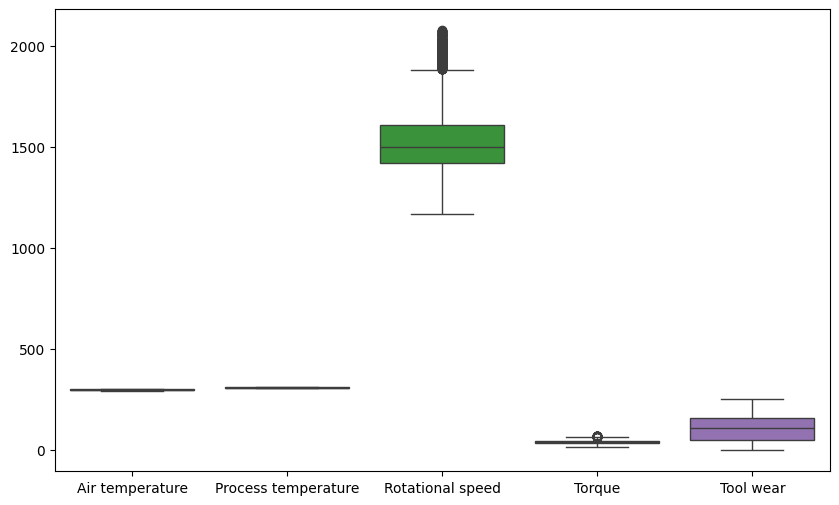

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = X[['Air temperature', "Process temperature", "Rotational speed" ,"Torque", "Tool wear"]])
plt.show()

In [ ]:
# from sklearn.preprocessing import OneHotEncoder # since the values have ordinal relationship
from sklearn.preprocessing import LabelEncoder

# Label encoding 'Type' column due to ordial characteristics of L, H, and M
Label_Encoder = LabelEncoder()
Encoded_df = X.copy()
Encoded_df['Type'] = Label_Encoder.fit_transform(X['Type'])

In [ ]:
display(Encoded_df)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


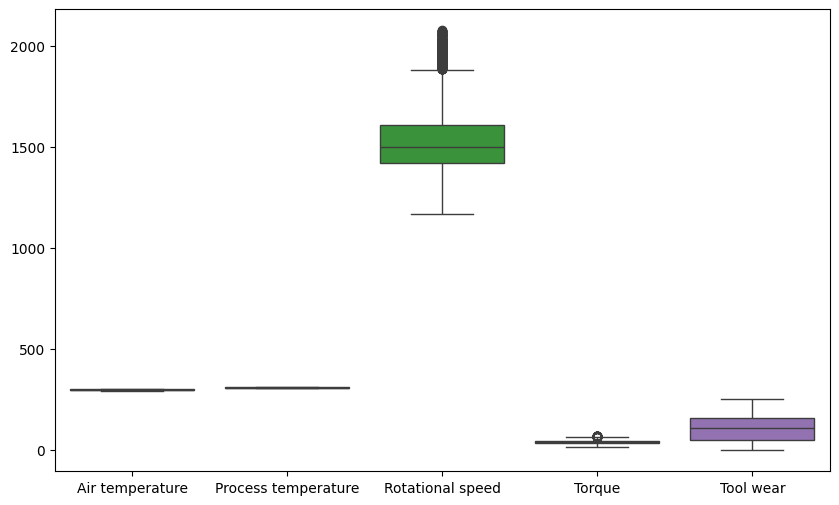

In [ ]:
# checking the statistics of the data using box plot

plt.figure(figsize = (10, 6))
sns.boxplot(data = X[['Air temperature', "Process temperature", "Rotational speed" ,"Torque", "Tool wear"]])
plt.show()


## 2.2. Data splitting

In [ ]:
from sklearn.model_selection import  train_test_split

#dropping the 'Type' feature out of the dataframe
Encoded_df = Encoded_df.drop('Type', axis=1)

# ensuring consistent random split when rerunning the model

# splitting features and target into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(Encoded_df,y, test_size=0.2, random_state=42)

# storing continous features for scaling


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(y_train.shape)
print(y_test.shape)
print(Encoded_df.shape)

X_train shape: (7857, 5)
X_test shape: (1965, 5)
(7857, 1)
(1965, 1)
(9822, 5)


## 2.3. Checking and handling data imbalance

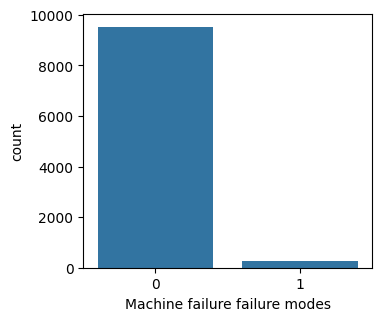

In [ ]:
#checking the number of 0 and 1s for each failure mode
plt.figure(figsize=(10, 6))
for values, col in enumerate(y.columns, 1):
  plt.subplot(2, 3, values)
  sns.countplot(x=y[col])
  plt.xlabel(f'{col} distribution')
  plt.xlabel(f'{col} failure modes')

plt.tight_layout()
plt.show()

From the plot, it is observed that the number of non-failures (class 0) outweighs the number of failures (class 1). Therefore the imbalance will significantly affect our predictions since the implemented model will not learn enough to predict failure, which is an important aspect of this problem. The data must be balance either through class weighing or oversam pling and undersampling techniques, and focal loss function.

## 2.4. Scaling numerical features

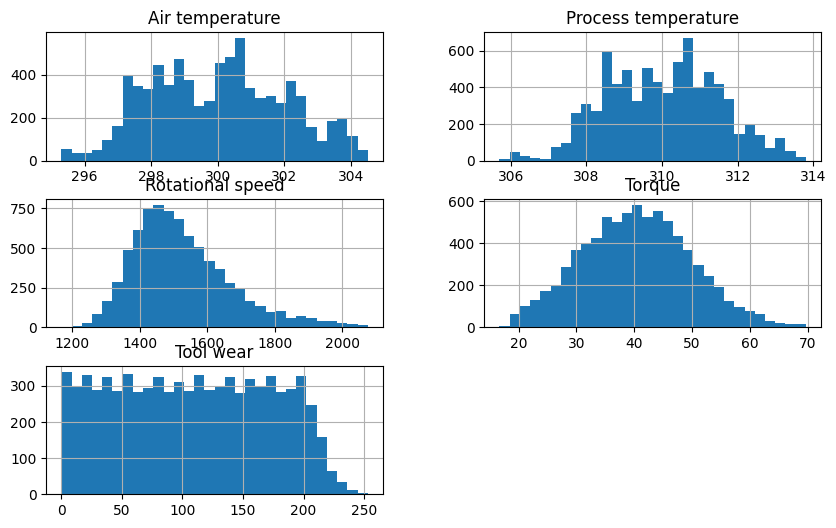

In [ ]:
# Assessing the distribution of features of the train set
X_train[['Air temperature', "Process temperature", "Rotational speed" ,"Torque", "Tool wear"]].hist(bins = 30, figsize = (10,6))
plt.tight_layout
plt.show()

Since the features are seemingly normally distributed, standardscaler would be a suitable method for scaling the numerical values

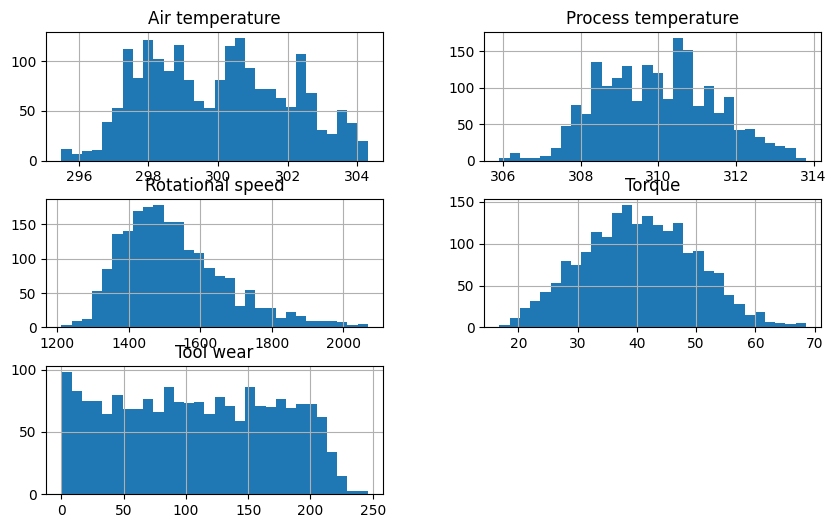

In [ ]:
# Assessing the distribution of features of the test set
X_test[['Air temperature', "Process temperature", "Rotational speed" ,"Torque", "Tool wear"]].hist(bins = 30, figsize = (10,6))
plt.tight_layout
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialising the scalar
Scaler =StandardScaler()

# Fit scaler on the training dataset
X_train_scaled = Scaler.fit_transform(X_train[continuous_features])

# Transforming the test set
X_test_scaled = Scaler.fit_transform(X_test[continuous_features])

# Conerting to dataframes and merging the dataframes for training set
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_features)
X_train = pd.concat([X_train.drop(continuous_features, axis=1).reset_index(drop=True), X_train_scaled], axis=1)

# Conerting to dataframes and merging the dataframes for test set
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_features)
X_test = pd.concat([X_test.drop(continuous_features, axis=1).reset_index(drop=True), X_test_scaled], axis=1)


In [ ]:
#checking if the data is still in the right shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train shape: (7857, 5)
X_test shape: (1965, 5)
y_train shape: (7857, 1)
y_test shape: (1965, 1)
X_train_scaled shape: (7857, 5)
X_test_scaled shape: (1965, 5)


In [ ]:
print(y_train)

      Machine failure
1630                0
8                   0
4288                0
100                 0
6273                0
...               ...
5841                0
5288                0
5492                0
873                 0
7407                0

[7857 rows x 1 columns]


In [ ]:
# getting the validation data as 20% of training dataset
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_val.shape)
print(y_val.shape)

(1572, 5)
(1572, 1)


In [ ]:
# Balancing the training set using SMOTE
! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_final, y_train_final)

In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(12190, 5)
(12190, 1)


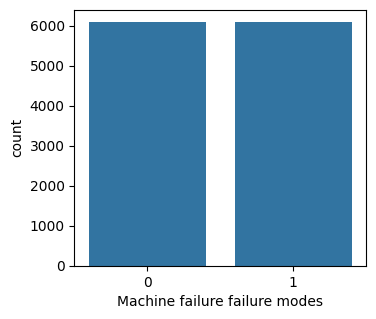

In [ ]:
# checking if the data is balanced
plt.figure(figsize=(10, 6))
for values, col in enumerate(y_train_resampled.columns, 1):
  plt.subplot(2, 3, values)
  sns.countplot(x=y_train_resampled[col])
  plt.xlabel(f'{col} distribution')
  plt.xlabel(f'{col} failure modes')

plt.tight_layout()
plt.show()

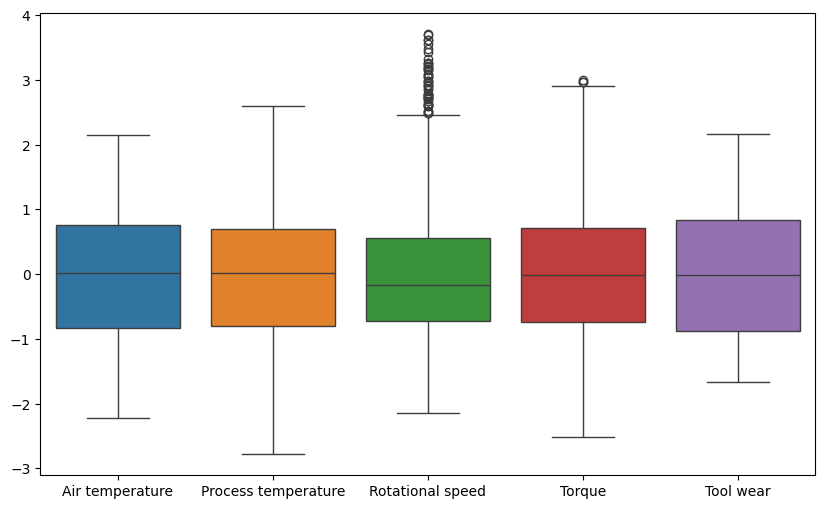

In [ ]:
# checking the statistics of the data using box plot
Column_labels = ["Air temperature", "Process temperature", "Rotational speed" ,"Torque", "Tool wear", "Type_H","Type_L" ,"Type_M"]
df_X_train_scaled = pd.DataFrame(X_test, columns=Column_labels)

plt.figure(figsize = (10, 6))
sns.boxplot(data = df_X_train_scaled[['Air temperature', "Process temperature", "Rotational speed" ,"Torque", "Tool wear"]])
plt.show()


# 4. Model definition and training

## 4.1. Fully Connected neural network

### 4.1.1. Model definition


In [ ]:
# Importing relevant libraries
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
from tensorflow.keras.callbacks import ModelCheckpoint

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
# define the fully connected neural network input layer
from keras import regularizers


model = Sequential()

model.add(Dense(units=512, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dropout(0.5)) # to prevent overfitting (float values between 0 and 1)
model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

#sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
# Compile the model
cp = ModelCheckpoint("model.keras", save_best_only=True)
model.compile(optimizer= Adam(learning_rate= 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,865 (269.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(np.isnan(X_train_scaled).any())
print(np.isnan(y_train).any())
print(np.isinf(X_train_scaled).any())
print(np.isinf(y_train).any())

Air temperature        False
Process temperature    False
Rotational speed       False
Torque                 False
Tool wear              False
dtype: bool
Machine failure    False
dtype: bool
Air temperature        False
Process temperature    False
Rotational speed       False
Torque                 False
Tool wear              False
dtype: bool
Machine failure    False
dtype: bool


In [ ]:
print(y_train_resampled.shape)
print(X_train_resampled.shape)

## 4.1.2. Model Training

In [ ]:
#Train the
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=42, validation_data=(X_val, y_val), callbacks=[cp])

Epoch 1/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7065 - loss: 0.5390 - val_accuracy: 0.7996 - val_loss: 0.4147
Epoch 2/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8530 - loss: 0.3540 - val_accuracy: 0.8448 - val_loss: 0.3480
Epoch 3/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8758 - loss: 0.3006 - val_accuracy: 0.8581 - val_loss: 0.3164
Epoch 4/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8906 - loss: 0.2746 - val_accuracy: 0.8728 - val_loss: 0.2909
Epoch 5/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8951 - loss: 0.2510 - val_accuracy: 0.8855 - val_loss: 0.2673
Epoch 6/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9068 - loss: 0.2388 - val_accuracy: 0.8899 - val_loss: 0.2488
Epoch 7/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9088 - loss: 0.2239 - val_accuracy: 0.8938 - val_loss: 0.2326
Epoch 8/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9111 - loss: 0.2172 - val_accu

In [ ]:
print(history)

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model.keras')

In [ ]:
print(model1)

<Sequential name=sequential, built=True>


In [ ]:
#predictions on training dataset
train_predictions = model.predict(X_train)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#prediction on validation dataset
val_predictions = model.predict(X_val)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(train_predictions)

[[8.5982879e-07]
 [9.5787896e-13]
 [8.4432745e-01]
 ...
 [1.2871101e-04]
 [8.8998964e-10]
 [2.3986243e-04]]


[]

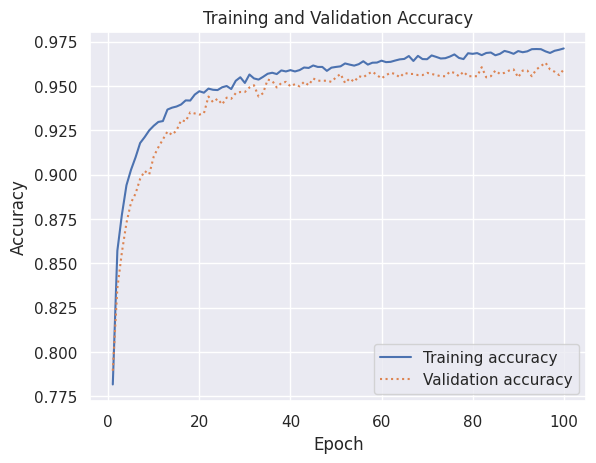

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
# Plotting loss with epochs for validation and training
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. Model testing and evaluation

In [ ]:
# Make predictions with test data
y_test_pred = model.predict(X_test) > 0.5

In [ ]:
print(y_test_pred)

In [ ]:
print(y_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#classification report
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

# Define labels for the axes
labels = ['0', '1']

# Create the heatmap
sns.heatmap(cf_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# plotting the confusion matrix with probability values
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# 6. Hyperparameter Tuning

**Recommendations**


1.   Batch Size
2.   Epoch
3.   learning rate
4.   Number of layers
5.   Momentum
6.   Activation function

